In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, Activation, Add, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras import Model
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt

# 1 Loading and observing data

In [2]:
(trainX,trainY),(testX,testY) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print(len(trainX), len(testX))

50000 10000


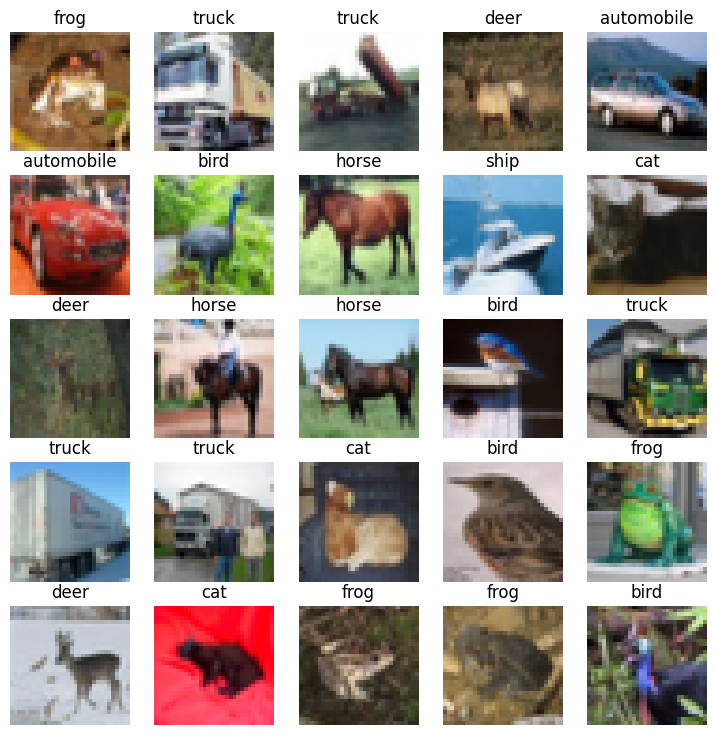

In [4]:
gridX = 5
gridY = 5

fig,axes = plt.subplots(gridX,gridY,figsize=(9,9))
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(gridX*gridY):
    axes[i//gridX,i%gridY].imshow(trainX[i])
    axes[i//gridX,i%gridY].set_title(labels[trainY[i][0]])
    axes[i//gridX,i%gridY].axis('off')

In [5]:
# scaling data
trainX = trainX / 255.0
testX = testX / 255.0


# 2 Convolutional Neural Network


In [37]:
#  original tiny VGG model

def build_original_tiny_vgg_model():
  input_shape = (32, 32, 3)
  kernel = (3, 3)

  input = Input(shape = input_shape )

  x = Conv2D(filters = 16, kernel_size =kernel, padding ='same', activation='relu')(input)
  x = MaxPool2D(pool_size =(2, 2), padding ='same')(x)

  x = Conv2D (filters = 64, kernel_size =kernel, padding ='same', activation='relu')(x)
  x = MaxPool2D(pool_size =(2, 2), padding ='same')(x)

  x = Flatten()(x)
  x = Dropout(rate =0.25)(x)
  x = Dense(units = 128, activation ='relu', use_bias = True)(x)
  x = Dense(units =10, activation ='softmax', use_bias = True)(x)

  model = Model(inputs = input, outputs = x)

  optimizer = tf.keras.optimizers.Adam()

  model.compile(
      optimizer = optimizer,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model



In [38]:
def train_model(model):
  model.fit(trainX, trainY, epochs = 100, validation_split = 0.3, batch_size = 128)

In [39]:
def test_model(model):
  return model.evaluate(testX, testY)

In [40]:
model = build_original_tiny_vgg_model()

model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        9280      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 4096)              0   

# 3 Training and evaluation


In [41]:
# train model
train_model(model)

Epoch 1/100
274/274 [==============================] - 4s 9ms/step - loss: 1.6118 - accuracy: 0.4194 - val_loss: 1.3640 - val_accuracy: 0.5229
Epoch 2/100
274/274 [==============================] - 2s 9ms/step - loss: 1.2531 - accuracy: 0.5586 - val_loss: 1.1710 - val_accuracy: 0.5971
Epoch 3/100
274/274 [==============================] - 2s 7ms/step - loss: 1.1171 - accuracy: 0.6081 - val_loss: 1.1005 - val_accuracy: 0.6213
Epoch 4/100
274/274 [==============================] - 2s 6ms/step - loss: 1.0287 - accuracy: 0.6435 - val_loss: 1.0319 - val_accuracy: 0.6449
Epoch 5/100
274/274 [==============================] - 2s 6ms/step - loss: 0.9637 - accuracy: 0.6659 - val_loss: 1.0108 - val_accuracy: 0.6535
Epoch 6/100
274/274 [==============================] - 2s 6ms/step - loss: 0.9053 - accuracy: 0.6861 - val_loss: 0.9766 - val_accuracy: 0.6629
Epoch 7/100
274/274 [==============================] - 2s 6ms/step - loss: 0.8621 - accuracy: 0.6982 - val_loss: 0.9558 - val_accuracy: 0.6726

In [44]:
test_model(model)

313/313 [==============================] - 1s 3ms/step - loss: 2.1318 - accuracy: 0.6889


[2.131791114807129, 0.6888999938964844]

In [ ]:
# run several times

num_runs = 5
accuracies = []

num_runs = 5
accuracies = []

for run_count in range(num_runs):
   print('Run count', run_count)
   model = build_original_tiny_vgg_model()

   train_model(model)
   test_loss, test_acc = test_model(model)

   accuracies.append(test_acc)

Run count 0
Epoch 1/100
274/274 [==============================] - 7s 16ms/step - loss: 1.6118 - accuracy: 0.4241 - val_loss: 1.3711 - val_accuracy: 0.5117
Epoch 2/100
274/274 [==============================] - 3s 11ms/step - loss: 1.2632 - accuracy: 0.5520 - val_loss: 1.1897 - val_accuracy: 0.5791
Epoch 3/100
274/274 [==============================] - 3s 10ms/step - loss: 1.1217 - accuracy: 0.6042 - val_loss: 1.1395 - val_accuracy: 0.5967
Epoch 4/100
274/274 [==============================] - 2s 9ms/step - loss: 1.0236 - accuracy: 0.6396 - val_loss: 1.0324 - val_accuracy: 0.6369
Epoch 5/100
274/274 [==============================] - 3s 9ms/step - loss: 0.9453 - accuracy: 0.6663 - val_loss: 0.9650 - val_accuracy: 0.6628
Epoch 6/100
274/274 [==============================] - 2s 9ms/step - loss: 0.8747 - accuracy: 0.6939 - val_loss: 0.9208 - val_accuracy: 0.6772
Epoch 7/100
274/274 [==============================] - 2s 7ms/step - loss: 0.8158 - accuracy: 0.7138 - val_loss: 0.9751 - val_a

In [ ]:
avg_accuracy = np.mean(accuracies)
std_dev = np.std(accuracies)

print(f"Average Accuracy: {avg_accuracy}, Standard Deviation: {std_dev}")

Average Accuracy: 0.703000009059906, Standard Deviation: 0.004509095353473339


# 4 Visualization


In [45]:
model_layers = [layer for layer in model.layers]
print("\n".join(map(lambda x: x.name, model_layers)))

input_9
conv2d_18
max_pooling2d_18
conv2d_19
max_pooling2d_19
flatten_8
dropout_8
dense_16
dense_17


In [46]:
remove_last_count = 4
remove_first_count = 1

model_layers = model_layers[remove_first_count:len(model_layers) - remove_last_count]
print("\n".join(map(lambda x: x.name, model_layers)))

conv2d_18
max_pooling2d_18
conv2d_19
max_pooling2d_19


1/1 [==============================] - 0s 97ms/step


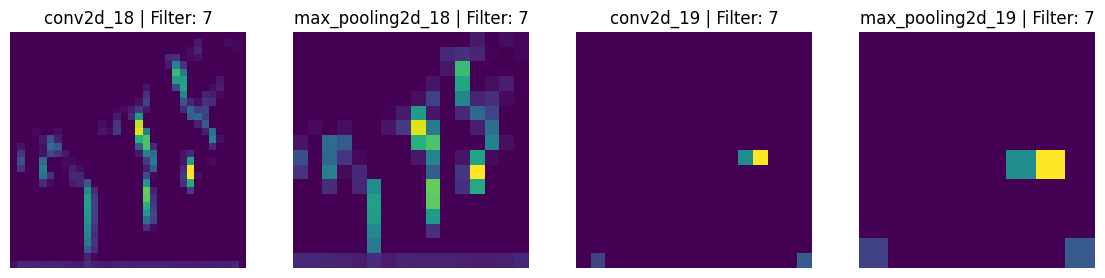

In [47]:
FILTER_INDEX = 7

layer_outputs = [layer.output for layer in model_layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

layer_names = [layer.name for layer in model_layers]

img_to_visualize = testX[10]
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

activations = activation_model.predict(img_to_visualize)


figsize = (14, 8)
fig, axs = plt.subplots(nrows=1, ncols=len(layer_names), figsize=figsize)
indexes = range(len(layer_names))
# layer_names [layer_name]
# activations [layer_activation]

for layer_name, layer_activation, i in zip(layer_names, activations, indexes):
      num_filters = layer_activation.shape[-1]

      axs[i].imshow(layer_activation[0, :, :, FILTER_INDEX], cmap='viridis')
      axs[i].set_title(f'{layer_name} | Filter: {FILTER_INDEX}')
      axs[i].axis('off')


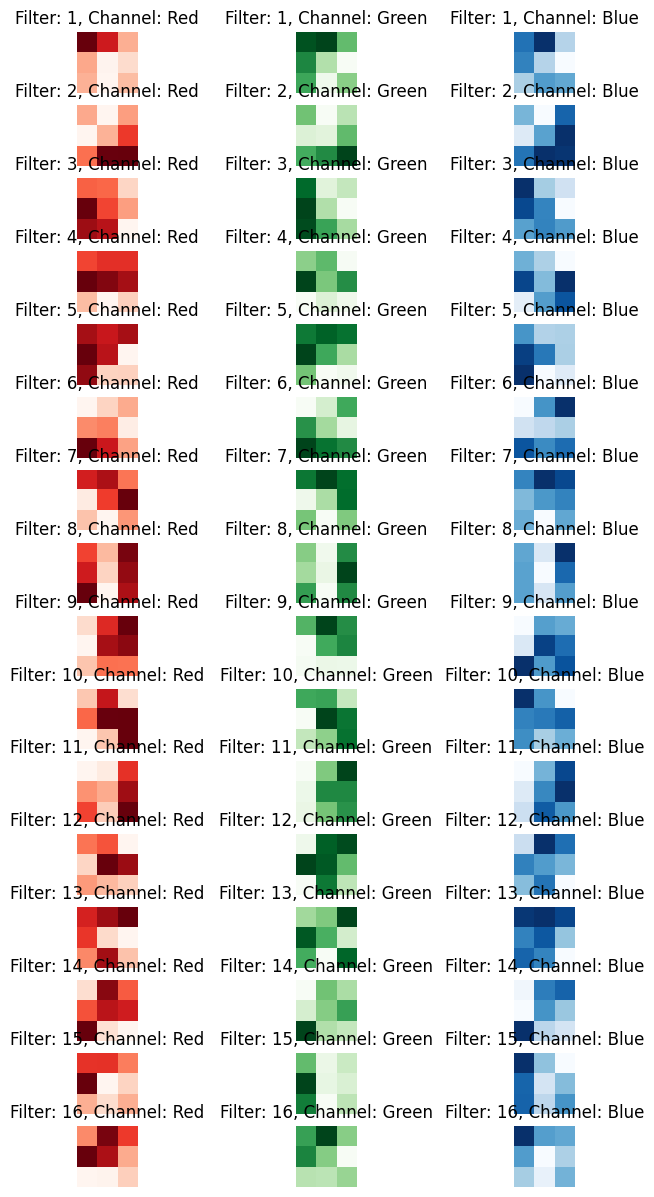

In [48]:
LAYER = 0

first_layer_weights = model_layers[LAYER].get_weights()[0]

filter_count = first_layer_weights.shape[-1]
channels_count = 3
fig, axs = plt.subplots(nrows=filter_count, ncols=channels_count, figsize=(8, 15))
cmaps = ['Reds', 'Greens', 'Blues']

for i in range(filter_count): # filters
    for j in range(channels_count):  # channels
        axs[i, j].imshow(first_layer_weights[:, :, j, i], cmap=cmaps[j])

        axs[i, j].set_title(f'Filter: {i+1}, Channel: {["Red", "Green", "Blue"][j]}')
        axs[i, j].axis('off')


**12**

In [15]:
from keras.applications import ResNet50

In [ ]:
model_resnet50 = ResNet50(weights='imagenet', include_top=False)

In [ ]:
# first layers observe
print("\n".join(map(lambda x: x.name, model_resnet50.layers[:10])))

input_68
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu


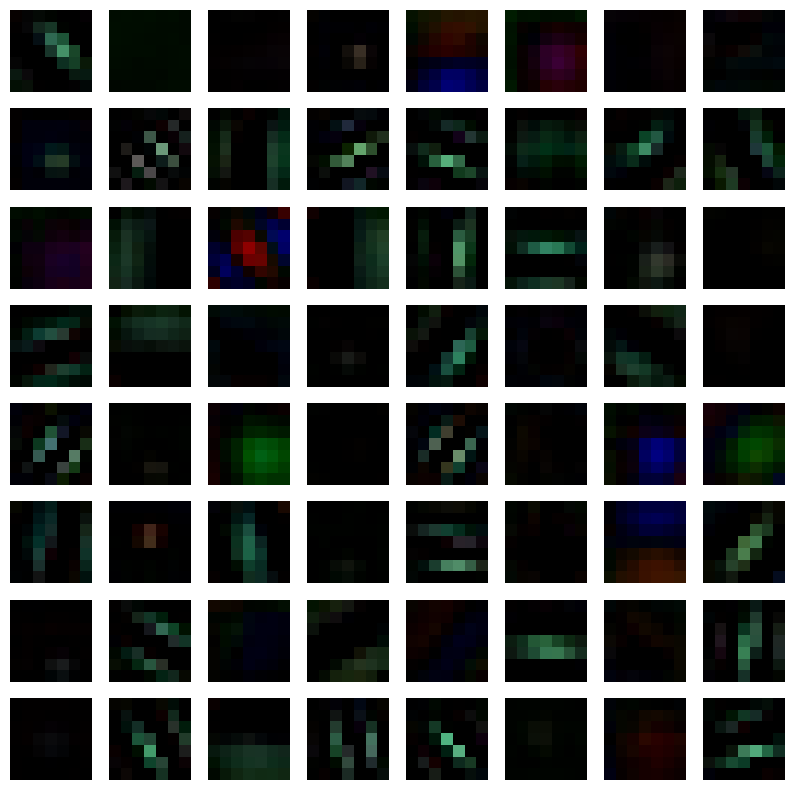

In [ ]:
weights_first_layer = model_resnet50.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10))

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(weights_first_layer[:, :, :, i], cmap='viridis')
    plt.axis('off')


13- In your original tiny VGG model, add BatchNormalization layers after each convolutions (before
activation) and run the experiments again to evaluate and analyze the new model’s performance and robustness.

In [49]:
def build_model_with_batchnorm():
  input_shape = (32, 32, 3)
  kernel = (3, 3)

  input = Input(shape = input_shape )

  x = Conv2D(filters = 16, kernel_size =kernel, padding ='same')(input)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPool2D(pool_size =(2, 2), padding ='same')(x)

  x = Conv2D(filters = 64, kernel_size =kernel, padding ='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPool2D(pool_size =(2, 2), padding ='same')(x)

  x = Flatten()(x)
  x = Dropout(rate =0.25)(x)
  x = Dense(units = 128, activation ='relu', use_bias = True)(x)
  x = Dense(units =10, activation ='softmax', use_bias = True)(x)

  model = Model(inputs = input, outputs = x)

  optimizer = tf.keras.optimizers.Adam()

  model.compile(
      optimizer = optimizer,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

In [50]:
model_with_batchnorm = build_model_with_batchnorm()

In [51]:
train_model(model_with_batchnorm)


Epoch 1/100
274/274 [==============================] - 5s 11ms/step - loss: 1.6722 - accuracy: 0.4023 - val_loss: 2.3440 - val_accuracy: 0.1815
Epoch 2/100
274/274 [==============================] - 3s 9ms/step - loss: 1.2335 - accuracy: 0.5559 - val_loss: 1.2212 - val_accuracy: 0.5604
Epoch 3/100
274/274 [==============================] - 2s 8ms/step - loss: 1.0845 - accuracy: 0.6125 - val_loss: 1.5441 - val_accuracy: 0.4730
Epoch 4/100
274/274 [==============================] - 2s 9ms/step - loss: 1.0012 - accuracy: 0.6464 - val_loss: 1.1097 - val_accuracy: 0.6173
Epoch 5/100
274/274 [==============================] - 2s 7ms/step - loss: 0.9478 - accuracy: 0.6656 - val_loss: 1.0459 - val_accuracy: 0.6341
Epoch 6/100
274/274 [==============================] - 2s 9ms/step - loss: 0.9009 - accuracy: 0.6831 - val_loss: 1.0888 - val_accuracy: 0.6261
Epoch 7/100
274/274 [==============================] - 2s 8ms/step - loss: 0.8562 - accuracy: 0.6999 - val_loss: 1.0294 - val_accuracy: 0.639

In [52]:
test_model(model_with_batchnorm)
# better than original tiny vgg

313/313 [==============================] - 1s 3ms/step - loss: 1.3466 - accuracy: 0.7139


[1.346617341041565, 0.7139000296592712]

14- Add an additional convolution block to the original tiny VGG model and run the experiments
again in order to see if the results are improved and more robust.

In [72]:
def build_model_with_additional_conv():
    input_shape = (32, 32, 3)
    kernel = (3, 3)

    input = Input(shape=input_shape)

    x = Conv2D(filters=16, kernel_size=kernel, padding='same', activation='relu')(input)
    x = MaxPool2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(filters=64, kernel_size=kernel, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(2, 2), padding='same')(x)

    # ADDED
    x = Conv2D(filters=128, kernel_size=kernel, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(2, 2), padding='same')(x)
    # ADDED

    x = Flatten()(x)
    x = Dropout(rate=0.25)(x)
    x = Dense(units=128, activation='relu', use_bias=True)(x)
    x = Dense(units=10, activation='softmax', use_bias=True)(x)

    model = Model(inputs=input, outputs=x)

    optimizer = tf.keras.optimizers.Adam()

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



In [73]:
model_with_additional_conv = build_model_with_additional_conv()

In [74]:
train_model(model_with_additional_conv)

Epoch 1/100
274/274 [==============================] - 5s 11ms/step - loss: 1.6661 - accuracy: 0.3955 - val_loss: 1.3946 - val_accuracy: 0.5017
Epoch 2/100
274/274 [==============================] - 2s 8ms/step - loss: 1.2790 - accuracy: 0.5435 - val_loss: 1.1909 - val_accuracy: 0.5775
Epoch 3/100
274/274 [==============================] - 3s 10ms/step - loss: 1.1143 - accuracy: 0.6058 - val_loss: 1.1097 - val_accuracy: 0.6093
Epoch 4/100
274/274 [==============================] - 2s 7ms/step - loss: 1.0018 - accuracy: 0.6487 - val_loss: 0.9850 - val_accuracy: 0.6589
Epoch 5/100
274/274 [==============================] - 2s 7ms/step - loss: 0.9264 - accuracy: 0.6752 - val_loss: 0.9328 - val_accuracy: 0.6780
Epoch 6/100
274/274 [==============================] - 2s 7ms/step - loss: 0.8625 - accuracy: 0.6983 - val_loss: 0.8948 - val_accuracy: 0.6903
Epoch 7/100
274/274 [==============================] - 2s 8ms/step - loss: 0.8099 - accuracy: 0.7138 - val_loss: 0.8565 - val_accuracy: 0.70

In [75]:
test_model(model_with_additional_conv)
# better than tiny vgg with batchnorm

313/313 [==============================] - 1s 3ms/step - loss: 1.6240 - accuracy: 0.7375


[1.6240204572677612, 0.737500011920929]

In [76]:
def build_resnet_like_model():
    input_shape = (32, 32, 3)
    kernel_size = (3, 3)

    input = Input(shape=input_shape)

    # First convolutional layer with kernel size 7x7, followed by BatchNormalization, Activation, and MaxPooling
    x = Conv2D(filters=64, kernel_size=(7, 7), padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 1
    residual = x
    x = Conv2D(filters=16, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Block 2
    residual = x
    x = Conv2D(filters=64, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('relu')(x)

    x = GlobalAveragePooling2D()(x)

    x = Dropout(rate=0.25)(x)
    x = Dense(units=128, activation='relu', use_bias=True)(x)
    x = Dense(units=10, activation='softmax', use_bias=True)(x)

    model = Model(inputs=input, outputs=x)

    optimizer = tf.keras.optimizers.Adam()

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



build_resnet_like_model()

In [77]:
resnet_like_model = build_resnet_like_model()

In [78]:
train_model(resnet_like_model)

Epoch 1/100
274/274 [==============================] - 10s 24ms/step - loss: 1.6927 - accuracy: 0.3597 - val_loss: 3.3965 - val_accuracy: 0.1148
Epoch 2/100
274/274 [==============================] - 5s 18ms/step - loss: 1.4100 - accuracy: 0.4782 - val_loss: 2.4703 - val_accuracy: 0.2947
Epoch 3/100
274/274 [==============================] - 6s 20ms/step - loss: 1.2838 - accuracy: 0.5281 - val_loss: 1.8786 - val_accuracy: 0.3624
Epoch 4/100
274/274 [==============================] - 5s 19ms/step - loss: 1.1981 - accuracy: 0.5624 - val_loss: 2.5219 - val_accuracy: 0.2844
Epoch 5/100
274/274 [==============================] - 5s 19ms/step - loss: 1.1291 - accuracy: 0.5883 - val_loss: 2.0481 - val_accuracy: 0.3901
Epoch 6/100
274/274 [==============================] - 6s 22ms/step - loss: 1.0614 - accuracy: 0.6164 - val_loss: 1.8088 - val_accuracy: 0.4273
Epoch 7/100
274/274 [==============================] - 6s 21ms/step - loss: 1.0197 - accuracy: 0.6331 - val_loss: 1.8166 - val_accuracy

In [79]:
test_model(resnet_like_model)

313/313 [==============================] - 1s 4ms/step - loss: 1.2072 - accuracy: 0.7185


[1.2071503400802612, 0.718500018119812]